Notebook to generate experiment csvs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conv = 12  #  5 min periods per hour

In [3]:
arr = np.full(3*conv, 40)
arr

array([40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40])

In [4]:
arr = np.append(arr, np.full(3*conv, -20))
arr

array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20])

In [5]:
arr = np.append(arr, np.full(3*conv, 60))
arr

array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60])

In [6]:
arr = np.append(arr, np.full(3*conv, 120))
arr

array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20,
       -20, -20, -20, -20, -20, -20, -20,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,
        60,  60,  60,  60, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120])

In [7]:
arr = np.append(arr, np.full(4*conv, 20))
arr.shape[0]/conv

16.0

In [8]:
arr = np.append(arr, np.full(2*conv, 100))
arr.shape[0]/conv

18.0

In [9]:
arr = np.append(arr, np.full(2*conv, 250))
arr.shape[0]/conv

20.0

In [10]:
arr = np.append(arr, np.full(4*conv, 100))
arr.shape[0]/conv

24.0

In [11]:
arr2 = np.arange(50,290,10)
arr2.shape[0]/conv

2.0

In [12]:
arr2 = np.append(arr2, np.flip(np.arange(50,290,10), axis=0))
arr2.shape[0]/conv

4.0

In [13]:
arr2 = np.tile(arr2,6)
arr2.shape[0]/conv

24.0

In [14]:
x = np.linspace(-np.pi, np.pi, arr2.shape[0])
arr3 = np.sin(x)*100
arr3.shape[0]/conv

24.0

In [15]:
final_arr = np.append(arr, arr2)
final_arr = np.append(final_arr, arr3)
final_arr.shape[0]/conv/24

3.0

In [16]:
index = pd.DatetimeIndex(start='01/01/2017 00:00', periods=final_arr.shape[0], freq='5min')
state = pd.DataFrame(dtype=float)
state.loc[:, 'C_electricity_price [$/MWh]'] = final_arr
state.index = index
state.head()

,C_electricity_price [$/MWh]
2017-01-01 00:00:00,40.0
2017-01-01 00:05:00,40.0
2017-01-01 00:10:00,40.0
2017-01-01 00:15:00,40.0
2017-01-01 00:20:00,40.0


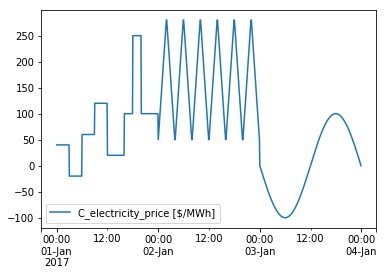

In [17]:
f, a = plt.subplots()
state.plot(ax=a)
f

In [19]:
observation = pd.concat([state.shift(-i) for i in range(10)], axis=1).fillna(0)
observation.tail()

,C_electricity_price [$/MWh],C_electricity_price [$/MWh],C_electricity_price [$/MWh],C_electricity_price [$/MWh],C_electricity_price [$/MWh],C_electricity_price [$/MWh],C_electricity_price [$/MWh],C_electricity_price [$/MWh],C_electricity_price [$/MWh],C_electricity_price [$/MWh]
2017-01-03 23:35:00,8.745865e+00,6.563069e+00,4.377127e+00,2.189088e+00,1.224647e-14,0.0,0.0,0.0,0.0,0.0
2017-01-03 23:40:00,6.563069e+00,4.377127e+00,2.189088e+00,1.224647e-14,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2017-01-03 23:45:00,4.377127e+00,2.189088e+00,1.224647e-14,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2017-01-03 23:50:00,2.189088e+00,1.224647e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2017-01-03 23:55:00,1.224647e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [20]:
observation.to_csv('observation.csv')
state.to_csv('state.csv')